# Predicting Abalone Age with Random Forest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import seaborn as sns

sns.set()

In [2]:
# read abalone data
x_list = []
labels = []
data_path = './data/abalone.data'

with open(data_path) as data:
    
    for line in data:
        # split on semicolon
        row = line.strip().split(',')
        
        # put labels in separate array and remove label from row
        labels.append(float(row.pop()))
        
        # form list of list of attributes (all strings)
        x_list.append(row)

In [3]:
# code three-valued sex attribute as numeric
x_coded = []

for row in x_list:
    # first code the three-valued sex variable
    coded_sex = [0.0, 0.0]
    
    if row[0] == 'M':
        coded_sex[0] = 1.0
        
    if row[0] == 'F':
        coded_sex[1] = 1.0
        
    num_row = [float(row[i]) for i in range(1, len(row))]
    row_coded = list(coded_sex) + num_row
    x_coded.append(row_coded)

In [4]:
# list of names
abalone_names = np.array(['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 
                          'Viscrea weight', 'Shell weight', 'Rings'])

# number of rows and columns in x matrix
n_rows = len(x_coded)
n_cols = len(x_coded[1])

# form x and y into numpy arrays and make up column names
x = np.array(x_coded)
y = np.array(labels)

# break into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=531)

# train random forest at a range of ensemble sizes in order to see how the mse changes
mse_oos = []
n_tree_list = range(50, 500, 10)

for i_trees in n_tree_list:
    depth = None
    # try tweaking
    max_feat = 4
    abalone_rf_model = ensemble.RandomForestRegressor(n_estimators=i_trees, max_depth=depth, max_features=max_feat,
                                                     oob_score=False, random_state=531)
    abalone_rf_model.fit(x_train, y_train)
    
    # Accumulate mse on test set
    prediction = abalone_rf_model.predict(x_test)
    mse_oos.append(mean_squared_error(y_test, prediction))
    
print(f'MSE: {mse_oos[-1]}')

MSE: 4.300814944862819


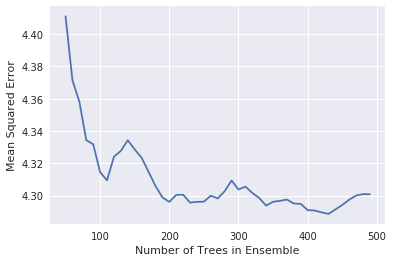

In [5]:
# plot training and test errors vs number of trees in ensemble
plt.plot(n_tree_list, mse_oos)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')
# plt.ylim([0.0, 1.1 * max(mse_oob)])
plt.show()

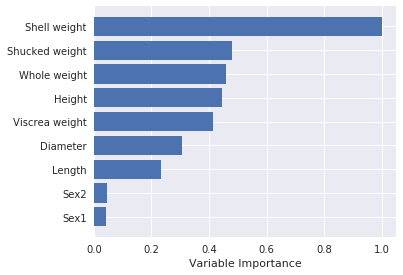

In [7]:
# Plot feature importance
feature_importance = abalone_rf_model.feature_importances_

# normalize by max importance
feature_importance = feature_importance/feature_importance.max()
sorted_idx = np.argsort(feature_importance)
bar_pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(bar_pos, feature_importance[sorted_idx], align='center')
plt.yticks(bar_pos, abalone_names[sorted_idx])
plt.xlabel('Variable Importance')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()